In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from fna.tools.signals import make_simple_kernel, pad_array

import os
import sys
import re
import sys

** mayavi.mlab ** package is not installed. To have functions using mayavi.mlab please install the package.
** pyspike ** package is not installed. To have functions using pyspike please install the package.
** pyspike ** package is not installed. To have functions using pyspike please install the package.


In [2]:
sys.path.append("demyelination/") # we need this to successfully read pickle files

In [133]:
! ls demyelination/data/plasticity-aone/activity/

'spk_plasticity-aone_T=0'


In [4]:
def smoothedspikes(spikes):
    tau = 500.
    spikes = spikes.time_slice(0, l)

    kernel = make_simple_kernel('exp', tau=tau, width=100., height=1./tau, resolution=1.)
    axis_, rates = spikes.averaged_instantaneous_rate(resolution=1., kernel=kernel, norm=1000)
    
    return axis_, rates

In [73]:
fls = [
    "spk_plasticity-aone_T=0_eCa=0.2_iCa=0.4",
]

pth = "demyelination/data/plasticity-aone/activity/"

l = 100000
recordstep = 5000

In [72]:
! ls demyelination/data/plasticity-aone/activity/

'spk_plasticity-aone_T=0_eCa=0.2_iCa=0.2'
'spk_plasticity-aone_T=0_eCa=0.2_iCa=0.4'


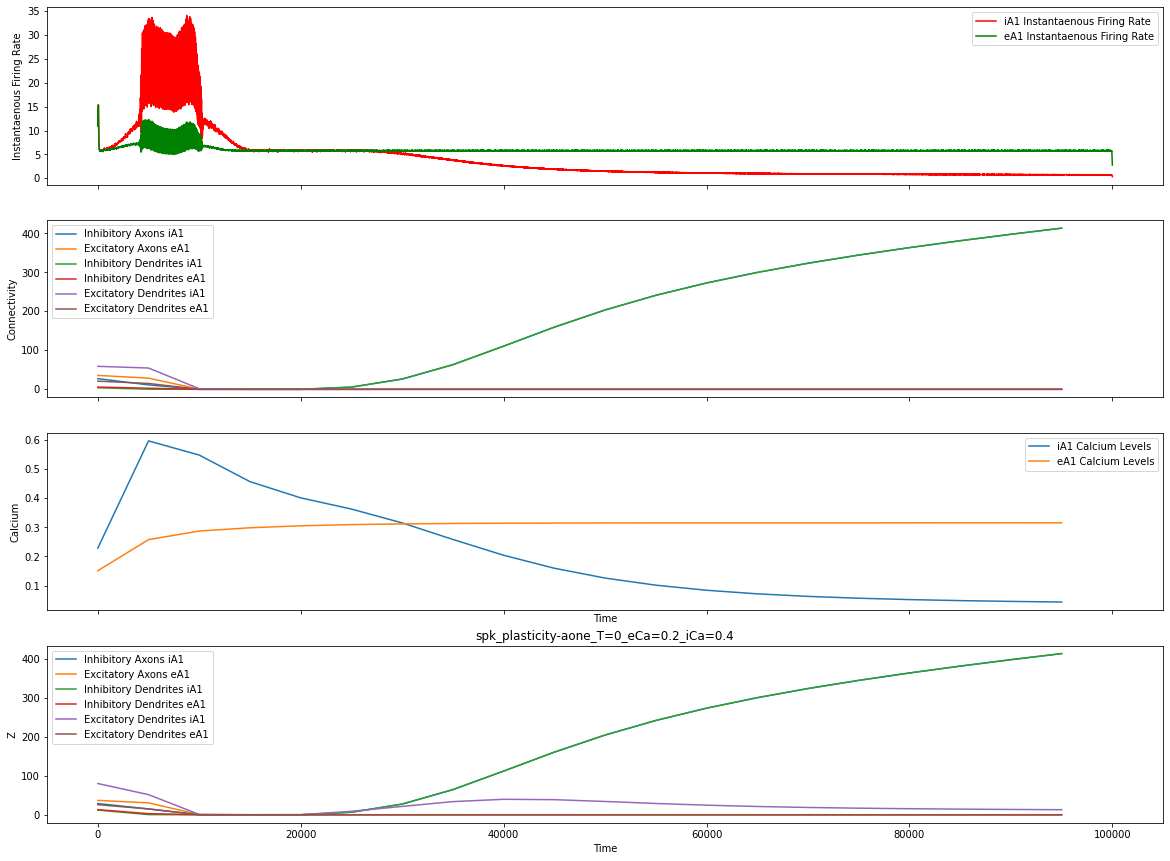

In [74]:
spk = pd.read_pickle(pth + fls[0])

fig, ax = plt.subplots(4, 1, sharex=True)
fig.set_size_inches(20, 15)

plt.title(fls[0])

# Inst Firing Rate
axis = ax[0]

x, y = smoothedspikes(spk.spikeobj['iA1'])
axis.plot(x, y, label="iA1 Instantaenous Firing Rate", c='r')

x, y = smoothedspikes(spk.spikeobj['eA1'])
axis.plot(x, y, label="eA1 Instantaenous Firing Rate", c='g')

axis.set_ylabel("Instantaenous Firing Rate")
axis.legend()

# Connectivity
axis = ax[1]

axis.plot(range(0, l, recordstep), spk.connectivity['z_connected']['Axon']['in']['iA1'], label="Inhibitory Axons iA1")
#axis.plot(range(0, l, recordstep), spk.connectivity['z_connected']['Axon']['in']['eA1'], label="iA1 Connectivity")
#axis.plot(range(0, l, recordstep), spk.connectivity['z_connected']['Axon']['ex']['iA1'], label="iA1 Connectivity")
axis.plot(range(0, l, recordstep), spk.connectivity['z_connected']['Axon']['ex']['eA1'], label="Excitatory Axons eA1")
axis.plot(range(0, l, recordstep), spk.connectivity['z_connected']['Den']['in']['iA1'], label="Inhibitory Dendrites iA1")
axis.plot(range(0, l, recordstep), spk.connectivity['z_connected']['Den']['in']['eA1'], label="Inhibitory Dendrites eA1")
axis.plot(range(0, l, recordstep), spk.connectivity['z_connected']['Den']['ex']['iA1'], label="Excitatory Dendrites iA1")
axis.plot(range(0, l, recordstep), spk.connectivity['z_connected']['Den']['ex']['eA1'], label="Excitatory Dendrites eA1")

axis.set_ylabel("Connectivity")
axis.legend()

# Calcium
axis = ax[2]
axis.plot(range(0, l, recordstep), spk.calcium['iA1'], label="iA1 Calcium Levels")

axis.plot(range(0, l, recordstep), spk.calcium['eA1'], label="eA1 Calcium Levels")

axis.set_ylabel("Calcium")
axis.legend()

axis.set_xlabel("Time")
axis.legend()

# Z
axis = ax[3]

axis.plot(range(0, l, recordstep), spk.connectivity['z']['Axon']['in']['iA1'], label="Inhibitory Axons iA1")
#axis.plot(range(0, l, recordstep), spk.connectivity['z']['Axon']['in']['eA1'], label="iA1 Connectivity")
#axis.plot(range(0, l, recordstep), spk.connectivity['z']['Axon']['ex']['iA1'], label="iA1 Connectivity")
axis.plot(range(0, l, recordstep), spk.connectivity['z']['Axon']['ex']['eA1'], label="Excitatory Axons eA1")
axis.plot(range(0, l, recordstep), spk.connectivity['z']['Den']['in']['iA1'], label="Inhibitory Dendrites iA1")
axis.plot(range(0, l, recordstep), spk.connectivity['z']['Den']['in']['eA1'], label="Inhibitory Dendrites eA1")
axis.plot(range(0, l, recordstep), spk.connectivity['z']['Den']['ex']['iA1'], label="Excitatory Dendrites iA1")
axis.plot(range(0, l, recordstep), spk.connectivity['z']['Den']['ex']['eA1'], label="Excitatory Dendrites eA1")

axis.set_ylabel("Z")
axis.legend()

axis.set_xlabel("Time")
axis.legend()

plt.savefig("/home/pbr-student/Downloads/thesis-plots/plasticity.pdf")